In [1]:
import tensorflow as tf
import numpy as np

In [2]:
g = tf.Graph()

In [3]:
with g.as_default():
    tf.set_random_seed(123)
    # placeholders
    tf_x = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_x')
    tf_y = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_y')
    # define the variable (model parameters)
    weight = tf.Variable(tf.random_normal(shape=(1, 1), stddev=0.25), name='weight')
    bias = tf.Variable(0.0, name='bias')
    # build the model
    y_hat = tf.add(weight * tf_x, bias, name='y_hat')
    # compute the cost
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name='cost')
    # train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
import matplotlib.pyplot as plt

In [5]:
np.random.seed(0)

In [6]:
def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    return x, 1.726*x -0.84 + np.array(y)

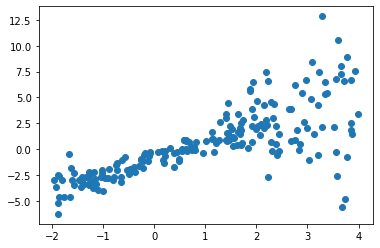

In [7]:
x, y = make_random_data()
plt.plot(x, y, 'o')
plt.show()

In [8]:
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

In [9]:
n_epochs = 500
training_costs = []

In [10]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'], feed_dict={'tf_x:0': x_train, 'tf_y:0': y_train})
        training_costs.append(c)
        if e % 50 == 0:
            print('Epoch {:4d}: {:.4f}'.format(e, c))

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


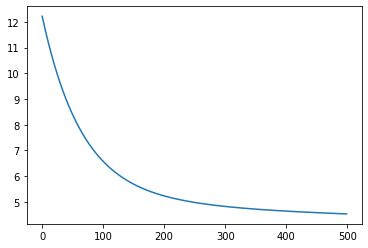

In [11]:
plt.plot(training_costs)
plt.show()